In [123]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MultiLabelBinarizer
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

cars = pd.read_csv('../Data/united_2.csv')

In [124]:
cars.head()

,Unnamed: 0,test,style,body,color,fuel,doors,production_date,transmission,engine_displacement,engine_power,mileage,drive_type,wheel,owners,price
0,0,0,525E,седан,золотистый,бензин,4,1986,механическая,2.7,125.0,220000.0,задний,Левый,2.0,50000.0
1,1,0,525i,седан,серый,бензин,4,1988,механическая,2.5,170.0,300000.0,задний,Левый,3.0,70000.0
2,2,0,318i,седан,зелёный,бензин,5,1994,механическая,1.8,115.0,350000.0,задний,Левый,3.0,70000.0
3,3,0,520i,седан,чёрный,бензин,4,1992,механическая,2.0,150.0,100000.0,задний,Левый,3.0,70000.0
4,4,0,520i,седан,чёрный,бензин,4,1992,механическая,2.0,150.0,250000.0,задний,Левый,3.0,75000.0


In [125]:
cars = cars.drop('Unnamed: 0', axis=1)

In [126]:
cars.nunique()

test                      2
style                   464
body                     10
color                    17
fuel                      5
doors                     4
production_date          49
transmission              3
engine_displacement      30
engine_power             88
mileage                4323
drive_type                3
wheel                     2
owners                    5
price                  2263
dtype: int64

In [127]:
def column_stats(column):

    if column.dtype == 'int64' or column.dtype == 'float64':

        display(column.describe())

        plt.figure(figsize=(8, 5))
        column.hist(bins=column.nunique())
    else:
        display(column.describe())
        display(column.value_counts())

In [128]:
def onehot_encode(data_frame, column, rename_params={}, rename=False):

    onehot_encoder = OneHotEncoder()

    # Кодируем переменные
    enc = onehot_encoder.fit_transform(column).toarray()

    # Создаем временный датафрейм
    temp_df = pd.DataFrame(enc, columns=onehot_encoder.categories_[0])

    if rename:
        # Переименовываем названия колонок
        temp_df.rename(columns=rename_params, inplace=True)

    # Добавляем полученный датафрейм к нашему датафрейму
    data_frame = pd.concat([data_frame, temp_df], axis=1)

    return data_frame

# Style

In [129]:
column_stats(cars['style'])

count     16012
unique      464
top         30d
freq        718
Name: style, dtype: object

30d                          718
320i                         566
35i                          536
520i                         520
20d                          413
520d                         373
116i                         327
318i                         282
30d                          257
520i                         246
30d xDrive Steptronic        235
20i                          227
3.0i                         226
320i                         206
525i                         201
320d                         195
35i                          195
528i                         181
40d                          181
523i                         175
30i                          174
18i                          167
118i                         145
520d xDrive Steptronic       141
318i                         137
116i                         136
525i                         136
325i                         135
530d                         134
3.0i                         129
3.0si     

In [130]:
cars['has_steptronic'] = cars['style'].str.extract(r'(Steptronic)')[0]

In [131]:
cars['has_steptronic'] = cars['has_steptronic'].apply(
    lambda x: 0 if pd.isna(x) else 1)

In [132]:
cars['has_xdrive'] = cars['style'].str.extract(r'(xDrive)')[0]

In [133]:
cars['has_xdrive'] = cars['has_xdrive'].apply(lambda x: 0 if pd.isna(x) else 1)

In [134]:
cars['style'] = cars['style'].str.split().str[0]

In [135]:
cars['style']

0         525E
1         525i
2         318i
3         520i
4         520i
         ...  
16007     520i
16008      30d
16009    525xi
16010     528i
16011      50i
Name: style, Length: 16012, dtype: object

In [136]:
style_le = LabelEncoder()
style_le.fit(cars['style'])
cars['style'] = style_le.transform(cars['style'])

# Body

In [137]:
column_stats(cars['body'])

count     16012
unique       10
top       седан
freq       7006
Name: body, dtype: object

седан           7006
внедорожник     6778
хэтчбек          903
купе             717
лифтбек          249
универсал        208
кабриолет        108
компактвэн        23
родстер           17
купе-хардтоп       3
Name: body, dtype: int64

In [138]:
params = {'внедорожник': 'offroad',
          'седан': 'sedan',
          'хэтчбек': 'hatchback',
          'купе': 'coupe',
          'лифтбек': 'liftback',
          'универсал': 'estate',
          'кабриолет': 'cabriolet',
          'родстер': 'roadster',
          'компактвэн': 'compact',
          'купе-хардтоп': 'coupe_hard'}

cars = onehot_encode(cars, cars[['body']], params, rename=True)
cars.drop(columns=['body'], inplace=True)

In [140]:
cars

,test,style,color,fuel,doors,production_date,transmission,engine_displacement,engine_power,mileage,drive_type,wheel,owners,price,has_steptronic,has_xdrive,offroad,cabriolet,compact,coupe,coupe_hard,liftback,roadster,sedan,estate,hatchback
0,0,96,золотистый,бензин,4,1986,механическая,2.7,125.0,220000.0,задний,Левый,2.0,50000.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,98,серый,бензин,4,1988,механическая,2.5,170.0,300000.0,задний,Левый,3.0,70000.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,44,зелёный,бензин,5,1994,механическая,1.8,115.0,350000.0,задний,Левый,3.0,70000.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,92,чёрный,бензин,4,1992,механическая,2.0,150.0,100000.0,задний,Левый,3.0,70000.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,92,чёрный,бензин,4,1992,механическая,2.0,150.0,250000.0,задний,Левый,3.0,75000.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16007,1,92,чёрный,бензин,4,2013,автоматическая,2.0,184.0,98000.0,задний,Левый,3.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16008,1,38,чёрный,дизель,5,2016,автоматическая,3.0,249.0,169615.0,полный,Левый,1.0,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16009,1,100,чёрный,бензин,4,2006,автоматическая,2.5,218.0,180000.0,полный,Левый,3.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16010,1,102,коричневый,бензин,4,2012,автоматическая,2.0,245.0,137500.0,полный,Левый,3.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Color

In [141]:
column_stats(cars['color'])

count      16012
unique        17
top       чёрный
freq        6213
Name: color, dtype: object

чёрный         6213
белый          2909
синий          2035
серый          1983
серебристый     903
коричневый      678
красный         494
зелёный         222
бежевый         178
голубой         120
оранжевый        87
золотистый       69
пурпурный        68
фиолетовый       41
жёлтый            9
бордовый          2
розовый           1
Name: color, dtype: int64

Резделим цвет на две категории:
    
    1) Белый, черный, серый, серебристый, синий
    2) Остальные цвета 

In [142]:
cars['color'] = cars['color'].apply(lambda x: 'main_color' if x in [
                                    'чёрный', 'белый', 'синий', 'серый', 'серебристый'] else 'other_color')

In [143]:
cars = onehot_encode(cars, cars[['color']])
cars.drop(columns=['color'], inplace=True)

# Fuel

In [144]:
column_stats(cars['fuel'])

count      16012
unique         5
top       бензин
freq       10302
Name: fuel, dtype: object

бензин        10302
дизель         5642
гибрид           38
бензин-газ       21
электро           9
Name: fuel, dtype: int64

In [145]:
params = {'бензин': 'gasoline',
          'дизель': 'diesel',
          'бензин-газ': 'gasoline_gas',
          'гибрид': 'hybrid',
          'электро': 'electro'}

cars = onehot_encode(cars, cars[['fuel']], params, rename=True)
cars.drop(columns=['fuel'], inplace=True)

# Doors

count    16012.000000
mean         4.390457
std          0.759462
min          2.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: doors, dtype: float64

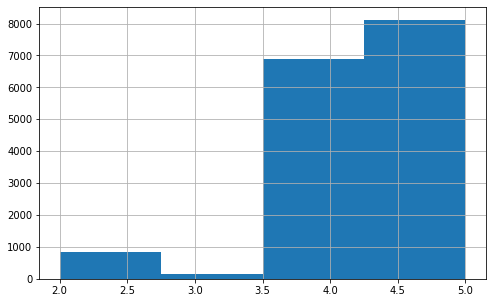

In [146]:
column_stats(cars['doors'])

# Production date

count    16012.000000
mean      2011.039720
std          6.673889
min       1947.000000
25%       2008.000000
50%       2012.000000
75%       2016.000000
max       2020.000000
Name: production_date, dtype: float64

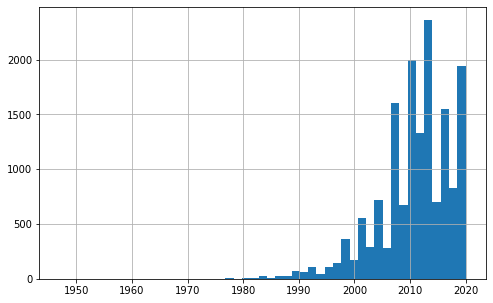

In [147]:
column_stats(cars['production_date'])

In [148]:
from datetime import datetime

cars['years_in_use'] = cars['production_date'].apply(
    lambda x: datetime.now().year-x)

In [149]:
cars['years_in_use'].value_counts()

7     1388
8     1330
9     1237
0     1013
6      974
12     934
1      927
2      827
4      799
10     764
3      746
5      697
11     673
13     668
15     362
16     360
17     294
14     284
18     281
19     276
22     191
21     169
20     168
23     144
24      71
29      59
28      58
27      53
30      42
26      41
25      40
31      31
32      29
33      14
36      13
37      13
34       9
38       7
40       5
39       5
35       5
42       3
48       2
73       1
72       1
43       1
52       1
45       1
70       1
Name: years_in_use, dtype: int64

# Transmission

In [150]:
column_stats(cars['transmission'])

count              16012
unique                 3
top       автоматическая
freq               14913
Name: transmission, dtype: object

автоматическая      14913
механическая          939
роботизированная      160
Name: transmission, dtype: int64

In [151]:
params = {'автоматическая': 'AT',
          'механическая': 'MT',
          'роботизированная': 'AM'}

cars = onehot_encode(cars, cars[['transmission']], params, rename=True)
cars.drop(columns=['transmission'], inplace=True)

# Engine displacement

count    16012.000000
mean         2.618199
std          0.795900
min          0.000000
25%          2.000000
50%          2.500000
75%          3.000000
max          6.600000
Name: engine_displacement, dtype: float64

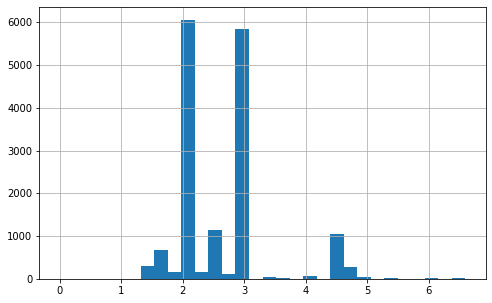

In [152]:
column_stats(cars['engine_displacement'])

# Engine power

count    16012.000000
mean       234.305396
std         82.072117
min         46.000000
25%        184.000000
50%        218.000000
75%        272.000000
max        625.000000
Name: engine_power, dtype: float64

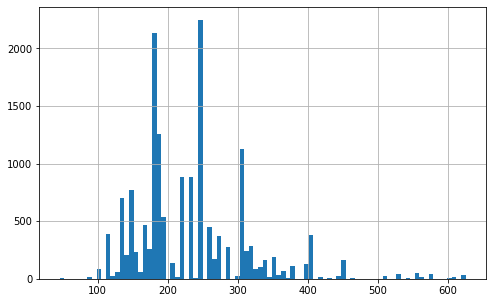

In [154]:
column_stats(cars['engine_power'])

In [155]:
def tax(data):

    if data <= 100:
        return float(data*12)

    elif data > 100 and data <= 125:
        return float(data*25)

    elif data > 125 and data <= 150:
        return float(data*35)

    elif data > 150 and data <= 175:
        return float(data*45)

    elif data > 175 and data <= 200:
        return float(data*50)

    elif data > 200 and data <= 225:
        return float(data*65)

    elif data > 225 and data <= 250:
        return float(data*75)

    elif data > 250:
        return float(data*150)


cars['tax'] = cars['engine_power'].apply(tax)

In [156]:
cars['tax'].value_counts()

9200.0     2131
9500.0     1244
18675.0    1231
45900.0    1125
18375.0    1016
14170.0     882
5250.0      769
4760.0      702
17325.0     619
7650.0      463
38700.0     450
9600.0      401
61050.0     382
40800.0     369
2875.0      297
48000.0     282
42900.0     276
17625.0     259
8850.0      256
46950.0     243
7020.0      236
53250.0     189
51000.0     162
67500.0     160
13260.0     134
60000.0     128
9650.0      121
4900.0      111
57150.0     107
5005.0       97
49950.0      94
39600.0      93
48900.0      85
39750.0      66
55050.0      61
7335.0       57
83250.0      54
4515.0       46
86250.0      45
2950.0       42
79500.0      41
2550.0       40
54000.0      31
93750.0      29
2825.0       28
45000.0      27
2625.0       25
3050.0       23
66750.0      23
2900.0       20
13715.0      19
1200.0       19
76050.0      18
52050.0      16
9850.0       14
63000.0      14
84000.0      14
3125.0       12
1080.0       12
40350.0      11
9400.0       11
91350.0      10
49350.0 

In [157]:
def tax_per_horse(data):

    if data <= 100:
        return 12

    elif data > 100 and data <= 125:
        return 25

    elif data > 125 and data <= 150:
        return 35

    elif data > 150 and data <= 175:
        return 45

    elif data > 175 and data <= 200:
        return 50

    elif data > 200 and data <= 225:
        return 65

    elif data > 225 and data <= 250:
        return 75

    elif data > 250:
        return 150


cars['tax_per_horse'] = cars['engine_power'].apply(tax_per_horse)

# Mileage

count      16012.000000
mean      135508.892081
std       101762.854122
min            0.000000
25%        60285.750000
50%       122000.000000
75%       191000.000000
max      1000000.000000
Name: mileage, dtype: float64

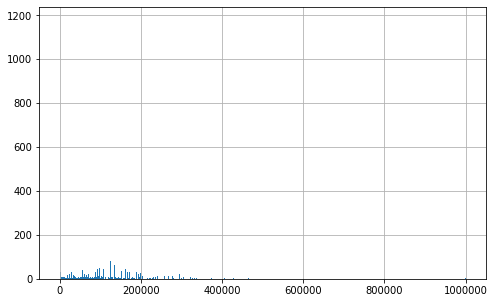

In [158]:
column_stats(cars['mileage'])

In [159]:
cars['mileage_per_day'] = cars['mileage'] / (cars['years_in_use'] * 365) 

# Drive type

In [160]:
column_stats(cars['drive_type'])

count      16012
unique         3
top       полный
freq        9661
Name: drive_type, dtype: object

полный      9661
задний      6222
передний     129
Name: drive_type, dtype: int64

In [161]:
params={'полный': 'AWD',
        'задний': 'RWD',
        'передний': 'FWD'}

cars = onehot_encode(cars, cars[['drive_type']], params, rename=True)
cars.drop(columns=['drive_type'], inplace=True)

# Wheel

In [162]:
column_stats(cars['wheel'])

count     16012
unique        2
top       Левый
freq      15986
Name: wheel, dtype: object

Левый     15986
Правый       26
Name: wheel, dtype: int64

In [163]:
params={'Левый': 'left',
        'Правый': 'right',
        }

cars = onehot_encode(cars, cars[['wheel']], params, rename=True)
cars.drop(columns=['wheel'], inplace=True)

# Owners

count    16012.000000
mean         2.110417
std          1.069293
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: owners, dtype: float64

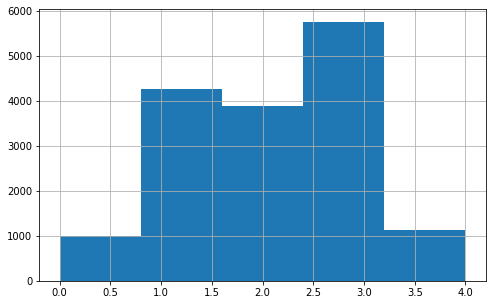

In [164]:
column_stats(cars['owners'])

In [165]:
cars.nunique()

test                      2
style                   184
doors                     4
production_date          49
engine_displacement      30
engine_power             88
mileage                4323
owners                    5
price                  2263
has_steptronic            2
has_xdrive                2
offroad                   2
cabriolet                 2
compact                   2
coupe                     2
coupe_hard                2
liftback                  2
roadster                  2
sedan                     2
estate                    2
hatchback                 2
main_color                2
other_color               2
gasoline                  2
gasoline_gas              2
hybrid                    2
diesel                    2
electro                   2
years_in_use             49
AT                        2
MT                        2
AM                        2
tax                      88
tax_per_horse             8
mileage_per_day        5703
RWD                 

In [169]:
cars.head(20)

,test,style,doors,production_date,engine_displacement,engine_power,mileage,owners,price,has_steptronic,has_xdrive,offroad,cabriolet,compact,coupe,coupe_hard,liftback,roadster,sedan,estate,hatchback,main_color,other_color,gasoline,gasoline_gas,hybrid,diesel,electro,years_in_use,AT,MT,AM,tax,tax_per_horse,mileage_per_day,RWD,FWD,AWD,left,right
0,0,96,4,1986,2.7,125.0,220000.0,2.0,50000.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,34,0.0,1.0,0.0,3125.0,25,17.727639,1.0,0.0,0.0,1.0,0.0
1,0,98,4,1988,2.5,170.0,300000.0,3.0,70000.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,32,0.0,1.0,0.0,7650.0,45,25.684932,1.0,0.0,0.0,1.0,0.0
2,0,44,5,1994,1.8,115.0,350000.0,3.0,70000.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,26,0.0,1.0,0.0,2875.0,25,36.880927,1.0,0.0,0.0,1.0,0.0
3,0,92,4,1992,2.0,150.0,100000.0,3.0,70000.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,28,0.0,1.0,0.0,5250.0,35,9.784736,1.0,0.0,0.0,1.0,0.0
4,0,92,4,1992,2.0,150.0,250000.0,3.0,75000.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,28,0.0,1.0,0.0,5250.0,35,24.461840,1.0,0.0,0.0,1.0,0.0
5,0,92,4,1992,2.0,150.0,400000.0,3.0,75000.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,28,0.0,1.0,0.0,5250.0,35,39.138943,1.0,0.0,0.0,1.0,0.0
6,0,92,4,1991,2.0,150.0,380000.0,3.0,77000.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,29,0.0,1.0,0.0,5250.0,35,35.899858,1.0,0.0,0.0,1.0,0.0
7,0,92,4,1991,2.0,150.0,190000.0,3.0,80000.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,29,0.0,1.0,0.0,5250.0,35,17.949929,1.0,0.0,0.0,1.0,0.0
8,0,44,5,1996,1.8,115.0,238000.0,3.0,82000.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,24,0.0,1.0,0.0,2875.0,25,27.168950,1.0,0.0,0.0,1.0,0.0
9,0,89,4,1975,2.0,115.0,88000.0,3.0,84000.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,45,0.0,1.0,0.0,2875.0,25,5.357686,1.0,0.0,0.0,1.0,0.0


In [167]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16012 entries, 0 to 16011
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   test                 16012 non-null  int64  
 1   style                16012 non-null  int64  
 2   doors                16012 non-null  int64  
 3   production_date      16012 non-null  int64  
 4   engine_displacement  16012 non-null  float64
 5   engine_power         16012 non-null  float64
 6   mileage              16012 non-null  float64
 7   owners               16012 non-null  float64
 8   price                16012 non-null  float64
 9   has_steptronic       16012 non-null  int64  
 10  has_xdrive           16012 non-null  int64  
 11  offroad              16012 non-null  float64
 12  cabriolet            16012 non-null  float64
 13  compact              16012 non-null  float64
 14  coupe                16012 non-null  float64
 15  coupe_hard           16012 non-null 

In [168]:
cars.to_csv('../Data/united_dummies_2.csv', index=False)

# Разделение на обучающую и тестовую выборку

In [177]:
test = cars[cars['test'] == 1].drop(['price'], axis=1)
X = cars[cars['test'] == 0].drop('price', axis=1).values
y = cars[cars['test'] == 0]['price'].values

In [178]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3724 entries, 12288 to 16011
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   test                 3724 non-null   int64  
 1   style                3724 non-null   int64  
 2   doors                3724 non-null   int64  
 3   production_date      3724 non-null   int64  
 4   engine_displacement  3724 non-null   float64
 5   engine_power         3724 non-null   float64
 6   mileage              3724 non-null   float64
 7   owners               3724 non-null   float64
 8   has_steptronic       3724 non-null   int64  
 9   has_xdrive           3724 non-null   int64  
 10  offroad              3724 non-null   float64
 11  cabriolet            3724 non-null   float64
 12  compact              3724 non-null   float64
 13  coupe                3724 non-null   float64
 14  coupe_hard           3724 non-null   float64
 15  liftback             3724 non-nul

In [181]:
X.shape

(12288, 39)

In [182]:
y.shape

(12288,)